In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

##### Importing Results

In [4]:
exp2=pd.read_csv('properties/Test 2/results.csv')
exp2.columns = exp2.columns.str.strip()
exp3=pd.read_csv('properties/Test_3/results.csv')
exp3.columns = exp3.columns.str.strip()
exp4=pd.read_csv('properties/Test_4/results.csv')
exp4.columns = exp4.columns.str.strip()

In [6]:
exp2.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

#### Baseline Model

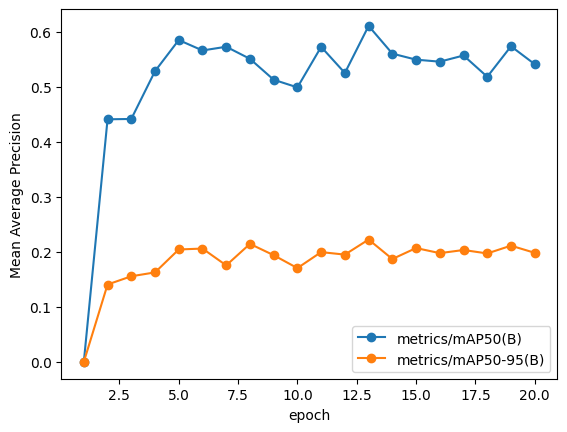

In [10]:
exp2.plot(x='epoch', y=['metrics/mAP50(B)','metrics/mAP50-95(B)' ], kind='line', marker='o', linestyle='-')

plt.ylabel('Mean Average Precision')
plt.savefig('map_acc.png')

## Attention module

#### Channel Attention

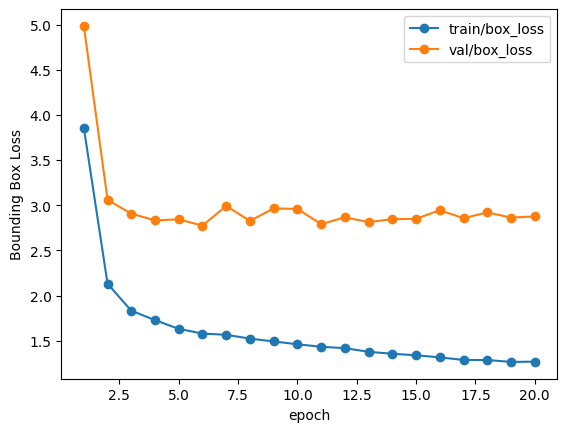

In [15]:
exp3.plot(x='epoch', y=['train/box_loss','val/box_loss' ], kind='line', marker='o', linestyle='-')

plt.ylabel('Bounding Box Loss')

plt.savefig('bbox-loss-ca.png')

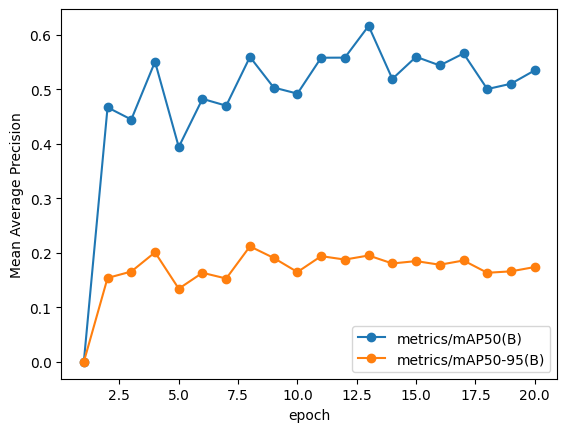

In [16]:
exp3.plot(x='epoch', y=['metrics/mAP50(B)','metrics/mAP50-95(B)' ], kind='line', marker='o', linestyle='-')

plt.ylabel('Mean Average Precision')
plt.savefig('map_acc-ca.png')

#### Efficient Channel Attention

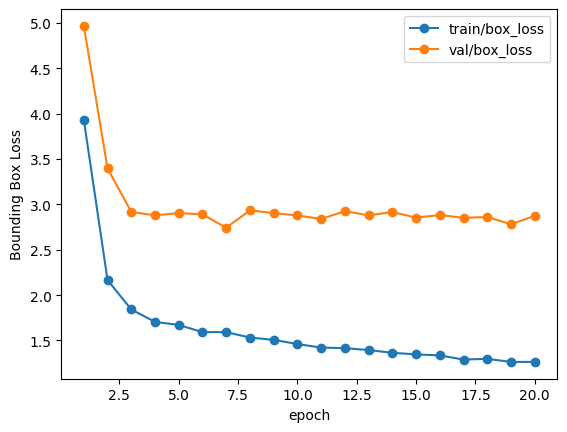

In [19]:
exp4.plot(x='epoch', y=['train/box_loss','val/box_loss' ], kind='line', marker='o', linestyle='-')

plt.ylabel('Bounding Box Loss')

plt.savefig('bbox-loss-eca.png')

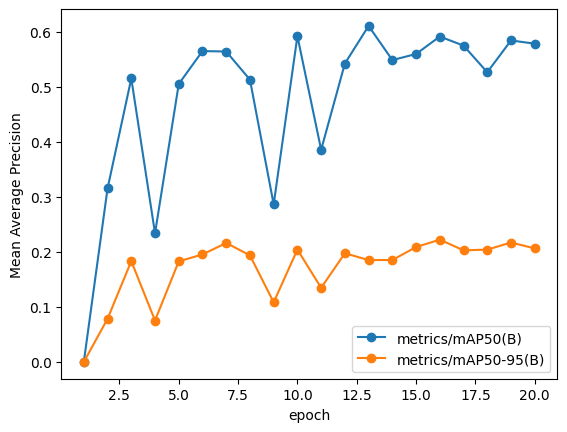

In [20]:
exp4.plot(x='epoch', y=['metrics/mAP50(B)','metrics/mAP50-95(B)' ], kind='line', marker='o', linestyle='-')

plt.ylabel('Mean Average Precision')
plt.savefig('map_acc-eca.png')

#### Model Evaluation

In [27]:
# Precision
x= exp2['epoch'].tolist()
e2= exp2['metrics/precision(B)'].tolist()
e3= exp3['metrics/precision(B)'].tolist()
e4= exp4['metrics/precision(B)'].tolist()

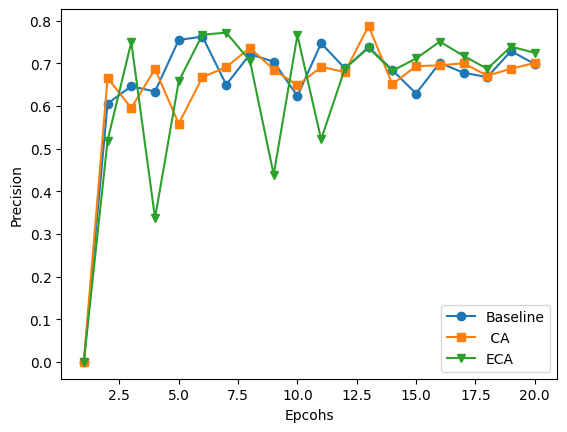

In [30]:
plt.plot(x, e2, label='Baseline', marker='o')
plt.plot(x, e3, label=' CA ', marker='s')
plt.plot(x, e4, label='ECA', marker='v')


plt.xlabel('Epcohs')
plt.ylabel('Precision')

plt.legend()

plt.savefig('precision.png')
plt.show()

In [31]:
### Recall
x= exp2['epoch'].tolist()
e2= exp2['metrics/recall(B)'].tolist()
e3= exp3['metrics/recall(B)'].tolist()
e4= exp4['metrics/recall(B)'].tolist()

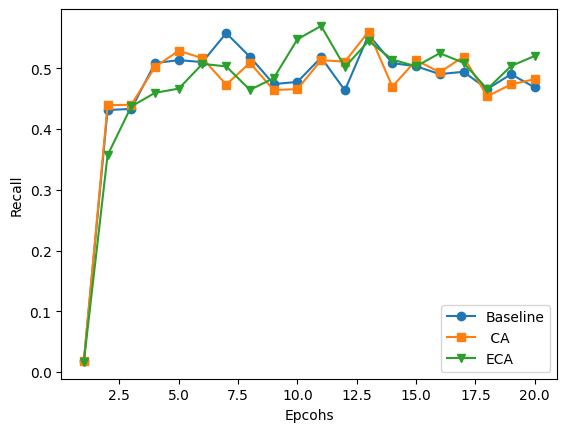

In [32]:
plt.plot(x, e2, label='Baseline', marker='o')
plt.plot(x, e3, label=' CA ', marker='s')
plt.plot(x, e4, label='ECA', marker='v')


plt.xlabel('Epcohs')
plt.ylabel('Recall')

plt.legend()

plt.savefig('recall.png')
plt.show()

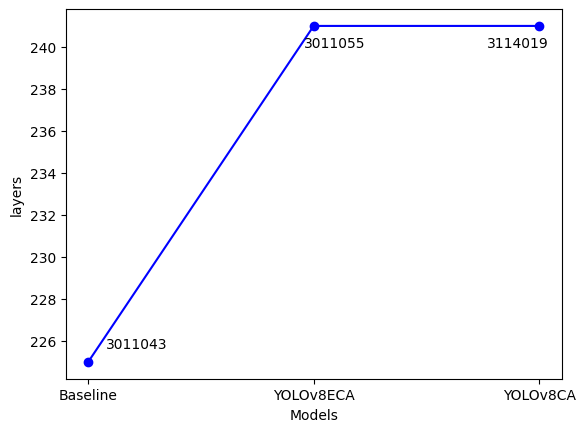

In [58]:
#### Model size
categories = ['Baseline', 'YOLOv8ECA', 'YOLOv8CA', ]
parameters = [ 3011043, 3011055, 3114019]
layers= [225,241,241]

plt.plot(categories, layers, marker='o', linestyle='-', color='b')

plt.annotate(parameters[0], (categories[0], layers[0]), textcoords="offset points", xytext=(35,10), ha='center')
# for i, txt in enumerate(parameters):
#     plt.annotate(txt, (categories[i], layers[i]), textcoords="offset points", xytext=(5,-10), ha='center')
plt.annotate(parameters[1], (categories[1], layers[1]), textcoords="offset points", xytext=(15,-15), ha='center')
plt.annotate(parameters[2], (categories[2], layers[2]), textcoords="offset points", xytext=(-15,-15), ha='center')
plt.xlabel('Models')
plt.ylabel('layers')

plt.savefig('model_size.png')
plt.show()

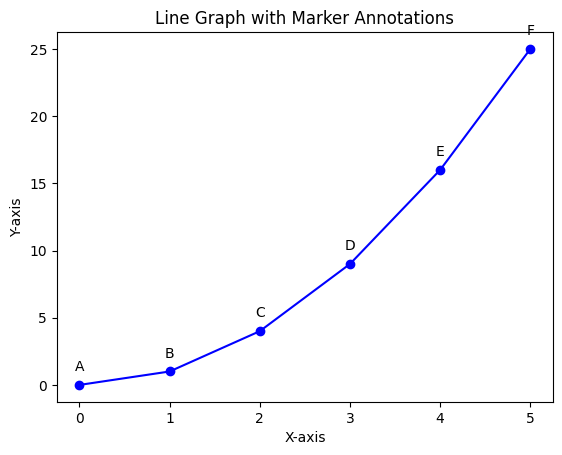

In [38]:
import matplotlib.pyplot as plt

# Step 1: Create data for the line graph
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]
marker_values = ['A', 'B', 'C', 'D', 'E', 'F']

# Step 2: Plot the line graph with markers
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Step 3: Annotate the markers with different values
for i, txt in enumerate(marker_values):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Step 4: Customize the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph with Marker Annotations')

# Step 5: Display the plot
plt.show()
